## 금주 목표
### 이번 시즌 팀 순위 시각화

In [1]:
import natsort as natsort
import pandas as pd
import os
import natsort
from datetime import date, datetime
import matplotlib.pyplot as plt
#from IPython.core.display_functions import display


In [2]:
team_list = ["LG", "SSG", "KT", "NC", "두산", "키움", "한화", "KIA", "삼성", "롯데"]

In [3]:
for month in range(4, 10):
    url = "https://sports.news.naver.com/kbaseball/schedule/index?&month={}&year=2022&teamCode=".format(month)
    df = pd.read_html(url)
    for i in range(1, len(df)-1): #제일 위에 column 목차가 df단위로 떨어져서 삭제하는걸로 함, 그리고 마지막 df는 <맨위로>키 정보가 있는 테이블이라 범위에 넣지 않음.
        if df[i][2][0] == "프로야구 경기가 없습니다.":
            continue
        remain= df[i].loc[:, [0, 1, 2, 4, 5]]
        remain.rename(columns={0:"일자", 1:"시각", 2:"경기결과", 4:"중계사", 5:"구장"} , inplace=True)
        text = remain["일자"][0].split()[0]
        remain["일자"] = text
        remain.to_csv("./date/"+text+'.csv', header=True, encoding='UTF-8', index=False)
    print(month, "완료")

4 완료
5 완료
6 완료
7 완료
8 완료
9 완료


## DataFrame 에서 얻어낸 것
1. 네이버는 https 프로토콜을 사용하므로 ssl때문에 certification 관련 추가 작업이 필요했음
1-1. 따라서 terminal에 `pip install --upgrade certifi`를 추가적으로 작성함
1-2. 그리고 Application > python 3.10 > install certifi 진행
2. 네이버의 경우, 일정별로 깔끔하게 떨어져서 나옴
3. 다만, 데이터프레임의 개수가 많이 나타남

## 게임차 계산방법
```
팀 게임 승점 = (전체경기수 - 진행된 경기수)*0.5 + 승리 수 + 무승부*0.5
1위 승점 - 현재 팀 승점
```
- 패배를 왜 뺐나 했는데, 정말로 게임차 계산할 때 패배는 들어가지 않음.
- 실제로도 승리랑 무승부 가지고 판단함

In [4]:
start_data = {"LG":[0,0,0,0],
              "KIA":[0,0,0,0],
              "NC":[0,0,0,0],
              "SSG":[0,0,0,0],
              "한화":[0,0,0,0],
              "두산":[0,0,0,0],
              "키움":[0,0,0,0],
              "삼성":[0,0,0,0],
              "KT":[0,0,0,0],
              "롯데":[0,0,0,0]}
KBO_team = pd.DataFrame(start_data, index= ["경기수", "승리", "무승부","패배"])
KBO_team = KBO_team.T
KBO_team

,경기수,승리,무승부,패배
LG,0,0,0,0
KIA,0,0,0,0
NC,0,0,0,0
SSG,0,0,0,0
한화,0,0,0,0
두산,0,0,0,0
키움,0,0,0,0
삼성,0,0,0,0
KT,0,0,0,0
롯데,0,0,0,0


In [5]:
order_list = os.listdir("./date")
sorted_list = natsort.natsorted(order_list)
sorted_list

['4.2.csv',
 '4.3.csv',
 '4.5.csv',
 '4.6.csv',
 '4.7.csv',
 '4.8.csv',
 '4.9.csv',
 '4.10.csv',
 '4.12.csv',
 '4.13.csv',
 '4.14.csv',
 '4.15.csv',
 '4.16.csv',
 '4.17.csv',
 '4.19.csv',
 '4.20.csv',
 '4.21.csv',
 '4.22.csv',
 '4.23.csv',
 '4.24.csv',
 '4.26.csv',
 '4.27.csv',
 '4.28.csv',
 '4.29.csv',
 '4.30.csv',
 '5.1.csv',
 '5.3.csv',
 '5.4.csv',
 '5.5.csv',
 '5.6.csv',
 '5.7.csv',
 '5.8.csv',
 '5.10.csv',
 '5.11.csv',
 '5.12.csv',
 '5.13.csv',
 '5.14.csv',
 '5.15.csv',
 '5.17.csv',
 '5.18.csv',
 '5.19.csv',
 '5.20.csv',
 '5.21.csv',
 '5.22.csv',
 '5.24.csv',
 '5.25.csv',
 '5.26.csv',
 '5.27.csv',
 '5.28.csv',
 '5.29.csv',
 '5.31.csv',
 '6.1.csv',
 '6.2.csv',
 '6.3.csv',
 '6.4.csv',
 '6.5.csv',
 '6.7.csv',
 '6.8.csv',
 '6.9.csv',
 '6.10.csv',
 '6.11.csv',
 '6.12.csv',
 '6.14.csv',
 '6.15.csv',
 '6.16.csv',
 '6.17.csv',
 '6.18.csv',
 '6.19.csv',
 '6.21.csv',
 '6.22.csv',
 '6.23.csv',
 '6.24.csv',
 '6.25.csv',
 '6.26.csv',
 '6.28.csv',
 '6.29.csv',
 '6.30.csv',
 '7.1.csv',
 '7.2.csv

In [6]:
for file in sorted_list:
    data = pd.read_csv("./date/" + file)
    for i in data.index:
        line = data.loc[i, :]

        if len(line[2].split(":")) == 1:
            continue

        away, home = line[2].split(":")
        home = home.split()
        away = away.split()
        h_score, h_team = home
        a_team, a_score = away
        h_score = int(h_score)
        a_score = int(a_score)

        if h_team == "나눔" or a_team == "나눔":
            continue #올스타전 제외

        #리팩토링은 항상 모두 완료하고나서 할 것
        if h_score > a_score: #홈팀 승리
            KBO_team.loc[h_team, ["승리"]] +=1
            KBO_team.loc[a_team, ["패배"]] +=1
        elif h_score < a_score:
            KBO_team.loc[a_team, ["승리"]] +=1
            KBO_team.loc[h_team, ["패배"]] +=1
        else:
            KBO_team.loc[h_team, ["무승부"]] +=1
            KBO_team.loc[a_team, ["무승부"]] +=1

        #경기수 구하기
        KBO_team["경기수"] = KBO_team["승리"] + KBO_team["패배"] + KBO_team["무승부"]

        #게임차 구하기
        KBO_team["승점"] = (144-KBO_team["경기수"])*0.5 + KBO_team["승리"] + KBO_team["무승부"]*0.5
        KBO_team.sort_values(by="승점", inplace=True, ascending=False)
        top = KBO_team["승점"][0]
        KBO_team["게임차"] = top - KBO_team["승점"]
        KBO_team.sort_values(by="승점", ascending=False, inplace=True)

        KBO_team["순위"] = [1,2,3,4,5,6,7,8,9,10]

        KBO_team.to_csv("./date_rank/"+file, header=True, encoding="UTF-8", index=True)
#원인찾았다. 이거 숫자가 문자열로 되어있어서 그랬음

In [7]:
KBO_team

,경기수,승리,무승부,패배,승점,게임차,순위
SSG,138,86,4,48,91.0,0.0,1
LG,135,83,2,50,88.5,2.5,2
키움,141,79,2,60,81.5,9.5,3
KT,138,77,2,59,81.0,10.0,4
KIA,137,66,1,70,70.0,21.0,5
NC,136,62,3,71,67.5,23.5,6
롯데,139,61,4,74,65.5,25.5,7
삼성,137,61,2,74,65.5,25.5,8
두산,136,57,2,77,62.0,29.0,9
한화,139,44,2,93,47.5,43.5,10


## 시각화 진행할 것

In [8]:
rank_list = os.listdir("./date_rank")
sorted_rank = natsort.natsorted(order_list)
print(sorted_rank)

['4.2.csv', '4.3.csv', '4.5.csv', '4.6.csv', '4.7.csv', '4.8.csv', '4.9.csv', '4.10.csv', '4.12.csv', '4.13.csv', '4.14.csv', '4.15.csv', '4.16.csv', '4.17.csv', '4.19.csv', '4.20.csv', '4.21.csv', '4.22.csv', '4.23.csv', '4.24.csv', '4.26.csv', '4.27.csv', '4.28.csv', '4.29.csv', '4.30.csv', '5.1.csv', '5.3.csv', '5.4.csv', '5.5.csv', '5.6.csv', '5.7.csv', '5.8.csv', '5.10.csv', '5.11.csv', '5.12.csv', '5.13.csv', '5.14.csv', '5.15.csv', '5.17.csv', '5.18.csv', '5.19.csv', '5.20.csv', '5.21.csv', '5.22.csv', '5.24.csv', '5.25.csv', '5.26.csv', '5.27.csv', '5.28.csv', '5.29.csv', '5.31.csv', '6.1.csv', '6.2.csv', '6.3.csv', '6.4.csv', '6.5.csv', '6.7.csv', '6.8.csv', '6.9.csv', '6.10.csv', '6.11.csv', '6.12.csv', '6.14.csv', '6.15.csv', '6.16.csv', '6.17.csv', '6.18.csv', '6.19.csv', '6.21.csv', '6.22.csv', '6.23.csv', '6.24.csv', '6.25.csv', '6.26.csv', '6.28.csv', '6.29.csv', '6.30.csv', '7.1.csv', '7.2.csv', '7.3.csv', '7.5.csv', '7.6.csv', '7.7.csv', '7.8.csv', '7.9.csv', '7.10.csv

In [9]:
test_df = pd.read_csv("./date_rank/"+sorted_rank[21], index_col=0)
date = sorted_rank[21].replace(".csv", '')
test_date = datetime.strptime("2022."+date, '%Y.%m.%d')
test_df["일자"] = test_date
test_list = list(test_df.loc["LG", :])
LG_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","승점", "게임차", "순위", "일자"])
LG_result.loc[len(LG_result)] = test_list

LG_result

,경기수,승리,무승부,패배,승점,게임차,순위,일자
0,22,13,0,9,74.0,4.5,3,2022-04-27


In [64]:
LG_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","승점", "게임차", "순위", "일자"])
KIA_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","승점", "게임차", "순위", "일자"])
KT_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","승점", "게임차", "순위", "일자"])
SSG_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","승점", "게임차", "순위", "일자"])
NC_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","승점", "게임차", "순위", "일자"])


In [65]:
for file in sorted_rank[5:]: #LG case 먼저 만들어보기
    if file == ".DS_Store":
        continue
    date = datetime.strptime("2022."+file.replace(".csv", ''), '%Y.%m.%d')
    test_df = pd.read_csv("./date_rank/" + file, index_col=0)
    test_df["일자"] = date
    #무식한 방법이라 꼭 리팩토링 해놓으셔
    LG = list(test_df.loc["LG", :])
    KIA = list(test_df.loc["KIA", :])
    NC = list(test_df.loc["NC", :])
    SSG = list(test_df.loc["SSG", :])
    KT = list(test_df.loc["KT", :])

    LG_result.loc[len(LG_result)] = LG
    KIA_result.loc[len(KIA_result)] = KIA
    NC_result.loc[len(NC_result)] = NC
    SSG_result.loc[len(SSG_result)] = SSG
    KT_result.loc[len(KT_result)] = KT

LG_result

,경기수,승리,무승부,패배,승점,게임차,순위,일자
0,6,5,0,1,74.0,1.0,2,2022-04-08
1,7,6,0,1,74.5,1.0,2,2022-04-09
2,8,7,0,1,75.0,1.0,2,2022-04-10
3,9,7,0,2,74.5,2.0,2,2022-04-12
4,10,7,0,3,74.0,3.0,2,2022-04-13
...,...,...,...,...,...,...,...,...
140,132,81,2,49,88.0,3.5,2,2022-09-25
141,133,82,2,49,88.5,3.0,2,2022-09-27
142,134,83,2,49,89.0,2.5,2,2022-09-28
143,135,83,2,50,88.5,2.5,2,2022-09-29


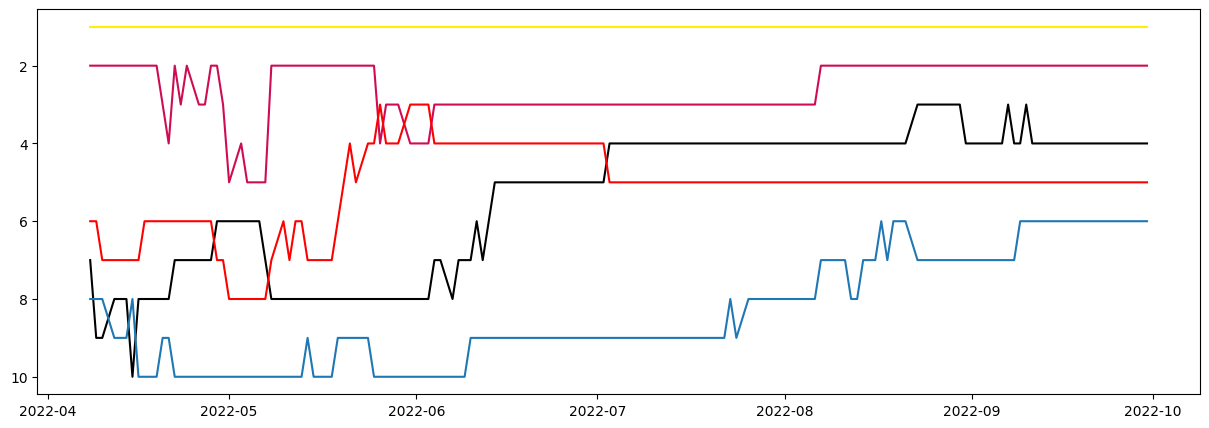

In [72]:
plt.figure(figsize=(15,5))
plt.gca().invert_yaxis()
plt.plot(LG_result["일자"], LG_result["순위"], color="#cf0c53")
plt.plot(KT_result["일자"], KT_result["순위"], color="k")
plt.plot(KIA_result["일자"], KIA_result["순위"], color="#ff0000")
plt.plot(NC_result["일자"], NC_result["순위"])
plt.plot(SSG_result["일자"], SSG_result["순위"], color="#fff000")